### Ping-Pong Activity

![ping-pong](images/pingpong.png)

In this notebook we will use Julia to simulate the game activity.



##### Evaluate the Position  in the circle

$$
pos(n,ping,pong) \mapsto ??
$$

#### Pseudo-Code

    p = 0
    step = 1
    for i : 1 .. N do
        p = p + step
        if (i mod ping) xor (i mod pong)
            step = (-1)* step
    return p


### Bedingung kgV = 1

In [12]:
function pp2(n,ping=3,pong=4) 
    step = 1
    pos = 0
    if gcd(ping,pong) != 1 
        return -1
    end
    for i in 1:n
        pos += step
        if (i%ping==0) !== (i%pong==0)
            step *= -1
        end
    end
    return pos
end

pp2 (generic function with 3 methods)

In [2]:
function pingpong(n,ping=3,pong=4) 
    step = 1
    pos = 0
    if (ping%pong==0) | (pong%ping==0)
        return 0
    end
    for i in 1:n
        pos += step
        if (i%ping==0) !== (i%pong==0)
            step *= -1
        end
    end
    return pos
end

pingpong (generic function with 3 methods)

### Spiel von 1 bis 30


In [3]:
y = [pingpong(n) for n in 1:34]

34-element Array{Int64,1}:
  1
  2
  3
  2
  3
  4
  3
  2
  3
  2
  1
  0
 -1
  ⋮
 -1
  0
  1
  2
  3
  2
  3
  4
  3
  2
  3
  2

INFO: Updating METADATA...
INFO: Updating cache of Hexagons...
INFO: Updating cache of Showoff...
INFO: Updating cache of Compat...
INFO: Updating cache of Docile...
INFO: Updating cache of IJulia...
INFO: Updating cache of DualNumbers...
INFO: Updating cache of DataStructures...
INFO: Updating cache of Grid...
INFO: Updating cache of ArrayViews...
INFO: Updating cache of Calculus...
INFO: Updating cache of BinDeps...
INFO: Updating cache of GZip...
INFO: Updating cache of JSON...
INFO: Updating cache of DataArrays...
INFO: Updating cache of PDMats...
INFO: Updating cache of Distributions...
INFO: Updating cache of StatsBase...
INFO: Updating cache of DataFrames...
INFO: Computing changes...
INFO: Cloning cache of WoodburyMatrices from git://github.com/timholy/WoodburyMatrices.jl.git
INFO: Upgrading ArrayViews: v0.4.10 => v0.6.1
INFO: Upgrading BinDeps: v0.3.9 => v0.3.11
INFO: Upgrading Calculus: v0.1.6 => v0.1.7
INFO: Upgrading Compat: v0.3.7 => v0.4.1
INFO: Upgrading DataArrays: v0.2

(Existing KernelManager.kernel_cmd setting in ipython_config.py is untouched.)
(Existing IPythonWidget.execute_on_complete_input setting in ipython_qtconsole_config.py is untouched.)
(Existing FrontendWidget.lexer_class setting in ipython_qtconsole_config.py is untouched.)
(Existing NotebookApp.port setting in ipython_notebook_config.py is untouched.)
(Existing ipynblogo.png file untouched.)
(Existing ipynblogo.svg file untouched.)
(Existing favicon.ico file untouched.)
(Existing custom.js file untouched.)
(Existing julia.js file untouched.)
Writing IJulia kernelspec to /Users/guggisbe/.ipython/kernels/julia 0.3/kernel.json ...
(Existing logo-32x32.png file untouched.)
(Existing logo-64x64.png file untouched.)

================================[ BUILD ERRORS ]================================


 - packages with build errors remain installed in /Users/guggisbe/.julia/v0.3
 - build the package(s) and all dependencies with `Pkg.build("Homebrew", "Nettle", "ZMQ")`
 - build a single package b

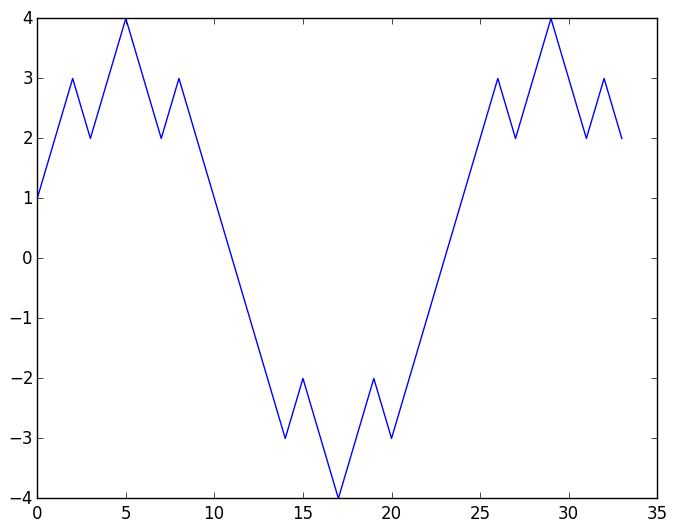

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1221089d0>

In [7]:
Pkg.update()
using PyPlot;
plot(y)

### Divergente Fälle

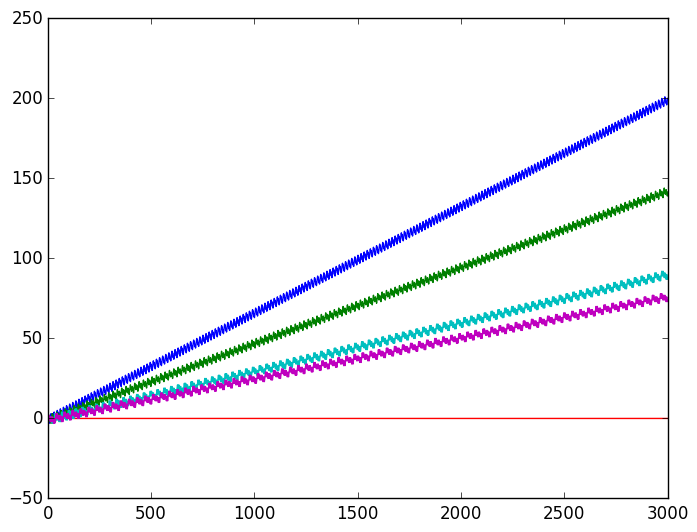

5-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x127fe0290>
 PyObject <matplotlib.lines.Line2D object at 0x127fe0710>
 PyObject <matplotlib.lines.Line2D object at 0x127fe0dd0>
 PyObject <matplotlib.lines.Line2D object at 0x127fe0090>
 PyObject <matplotlib.lines.Line2D object at 0x124b06910>

In [105]:
ymap = [pingpong(n,k,3) for n in 1:3000, k in 5:2:13
    
]
plot(ymap)

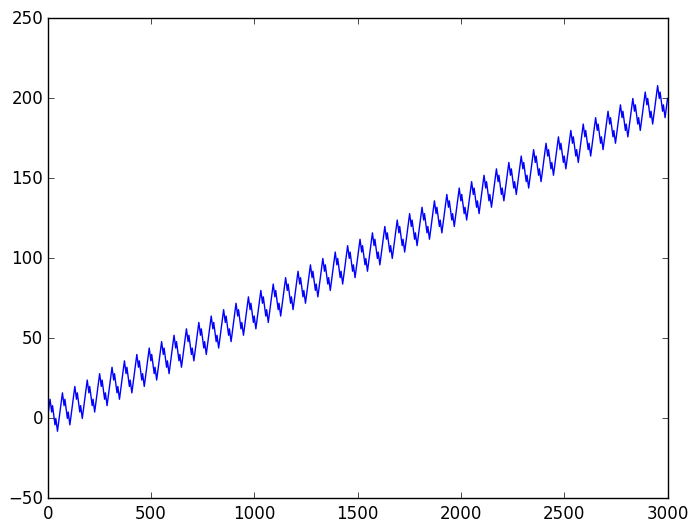

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1285a3910>

In [185]:
ymap = [pingpong(n,20,12) for n in 1:3000]
plot(ymap)

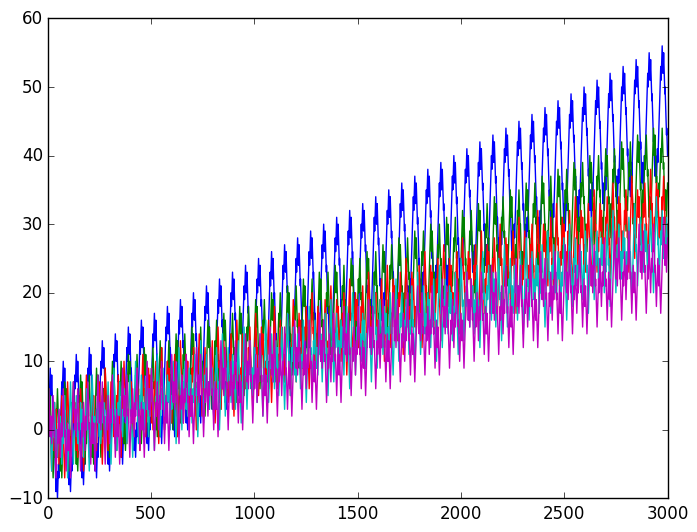

5-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1286c3a10>
 PyObject <matplotlib.lines.Line2D object at 0x1286c3c50>
 PyObject <matplotlib.lines.Line2D object at 0x1286a3650>
 PyObject <matplotlib.lines.Line2D object at 0x1286a31d0>
 PyObject <matplotlib.lines.Line2D object at 0x1286a3e10>

In [106]:
ymap = [pingpong(n,k,7) for n in 1:3000, k in 9:2:17
    
]
plot(ymap)

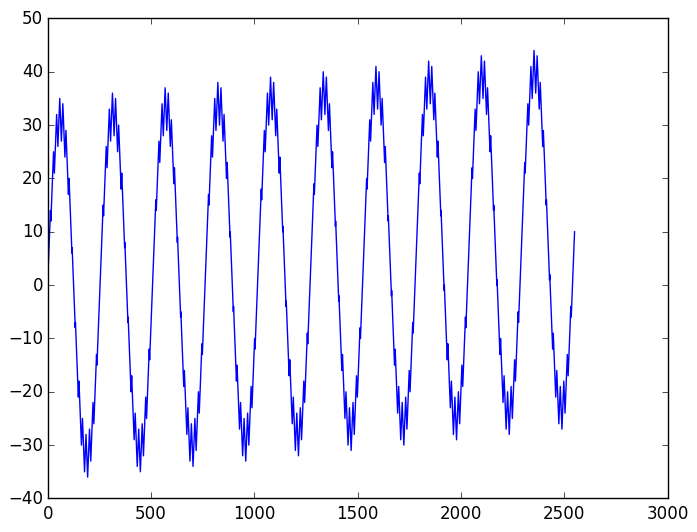

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x126255fd0>

In [109]:
ping=17
pong=15
plot([pingpong(n,ping,pong) for n in 1:10*ping*pong])

### Ping-Pong Wertekarten

In [13]:
ymap_set = [pingpong(33,k,l) for l in 1:37, k in 1:37
]
imshow(ymap_set);

LoadError: pingpong not defined
while loading In[13], in expression starting on line 1

min:-931   max:3953

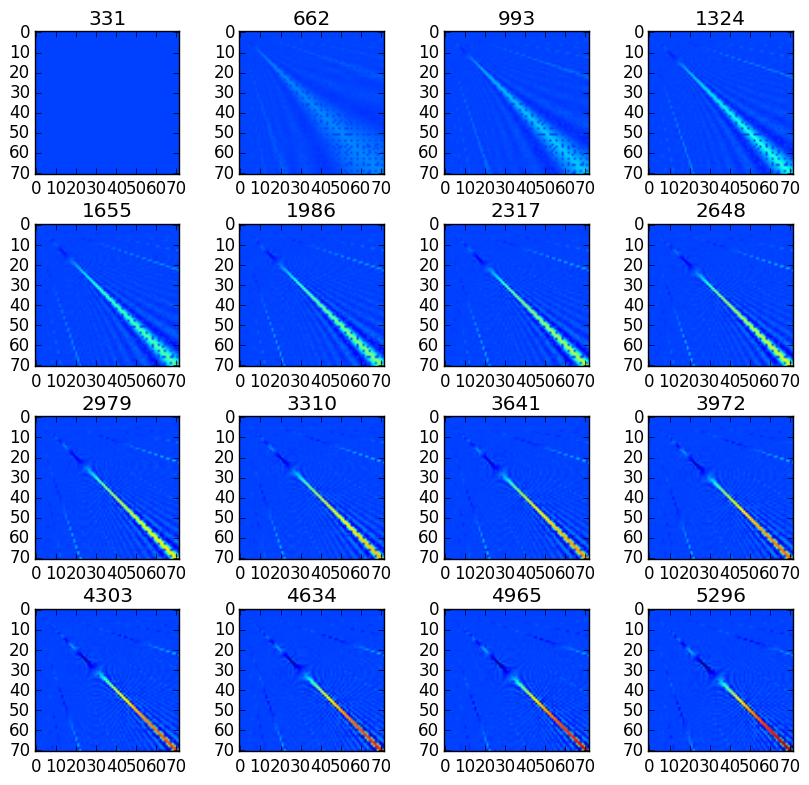

In [14]:
nmax = 5300
slices = 16
dn = round(nmax/slices)
mappp = [pp2(n,k,l) for  l in 3:2:144, k in 4:2:146,n in 1:dn:nmax
]
mappp_min=minimum(mappp)
mappp_max=maximum(mappp)


n_col = 4
n_row = round(slices/n_col)
print("min:")
print(mappp_min)
print("   max:")
print(mappp_max)

figure(figsize=(2 * n_col, 2 * n_row))
subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in 1:n_row * n_col
    subplot(n_row, n_col, i)
    title(int(i*dn))
    imshow(mappp[:,:,i],vmin=mappp_min,vmax=mappp_max)
end


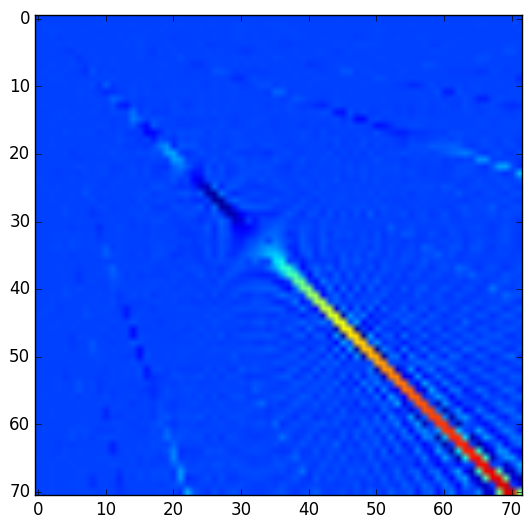

In [21]:
using PyCall
using PyPlot
@pyimport matplotlib.animation as anim

fig = figure()
#ax = axes(xlim=(0, 2), ylim=(-2, 2)) 
function init()
    return imshow(mappp[:,:,1],vmin=mappp_min,vmax=mappp_max)
end

# animation function.  This is called sequentially
function animate(i)
    return imshow(mappp[:,:,i+1],vmin=mappp_min,vmax=mappp_max)
end

# call the animator.  blit=True means only re-draw the parts that have changed.
an=anim.FuncAnimation(fig, animate, init_func=init,
                               frames=15, interval=1, blit=true)

an[:save]("basic_animation.mp4", fps=3, extra_args=["-vcodec", "libx264"])

show()

### Erzeuge Divergenzkarte mit kgv=1

In [201]:
pimax=12
nmax = pimax^2*3+10
pp_set = [pp2(n,k,l)  for k in 1:1:pimax,n in 1:1:nmax,   l in 1:1:pimax
]

result = [maximum(pp_set[k,2*k*l+1:3*k*l,l]-maximum(pp_set[k,1:k*l,l]))  for k in 1:1:pimax,l in 1:1:pimax]

12x12 Array{Any,2}:
 2  0  2  0  2  0  2  0  2  0  2  0
 0  0  0  0  0  0  0  0  0  0  0  0
 2  0  0  0  2  0  2  0  0  0  2  0
 0  0  0  0  0  0  0  0  0  0  0  0
 2  0  2  0  0  0  2  0  2  0  2  0
 0  0  0  0  0  0  0  0  0  0  0  0
 2  0  2  0  2  0  0  0  2  0  2  0
 0  0  0  0  0  0  0  0  0  0  0  0
 2  0  0  0  2  0  2  0  0  0  2  0
 0  0  0  0  0  0  0  0  0  0  0  0
 2  0  2  0  2  0  2  0  2  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0

In [52]:
@code_native pinpong(30)

	.section	__TEXT,__text,regular,pure_instructions
Filename: In[13]
Source line: 2
	push	RBP
	mov	RBP, RSP
Source line: 2
	movabs	RAX, 4588253200
	mov	ESI, 3
	mov	EDX, 4
	call	RAX
	pop	RBP
	ret


In [7]:
for i in 1:10 
    print(i)
    print('\t')
end

1	2	3	4	5	6	7	8	9	10	

In [8]:
ping = 3
n = 9
if n%ping==0
    print ("ping")
end

ping

In [78]:
test = [r*d for r in 1:10, d in 1:10]

10x10 Array{Int64,2}:
  1   2   3   4   5   6   7   8   9   10
  2   4   6   8  10  12  14  16  18   20
  3   6   9  12  15  18  21  24  27   30
  4   8  12  16  20  24  28  32  36   40
  5  10  15  20  25  30  35  40  45   50
  6  12  18  24  30  36  42  48  54   60
  7  14  21  28  35  42  49  56  63   70
  8  16  24  32  40  48  56  64  72   80
  9  18  27  36  45  54  63  72  81   90
 10  20  30  40  50  60  70  80  90  100

In [71]:
help("imshow")


Display an image on the axes.

Parameters
-----------
X : array_like, shape (n, m) or (n, m, 3) or (n, m, 4)
    Display the image in `X` to current axes.  `X` may be a float
    array, a uint8 array or a PIL image. If `X` is an array, it
    can have the following shapes:

    - MxN -- luminance (grayscale, float array only)
    - MxNx3 -- RGB (float or uint8 array)
    - MxNx4 -- RGBA (float or uint8 array)

    The value for each component of MxNx3 and MxNx4 float arrays
    should be in the range 0.0 to 1.0; MxN float arrays may be
    normalised.

cmap : `~matplotlib.colors.Colormap`, optional, default: None
    If None, default to rc `image.cmap` value. `cmap` is ignored when
    `X` has RGB(A) information

aspect : ['auto' | 'equal' | scalar], optional, default: None
    If 'auto', changes the image aspect ratio to match that of the
    axes.

    If 'equal', and `extent` is None, changes the axes aspect ratio to
    match that of the image. If `extent` is not `None`, the axes
 